In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score 

import warnings
warnings.filterwarnings('ignore')


# 1-Read DataSet

In [2]:
data = pd.read_csv("Emotion_Dataset.csv") 

# 2 - Exploratory Data Analysis

In [3]:
# data.head()

In [4]:
# data.tail()

In [5]:
# data.info()

In [6]:
# data.describe()

In [7]:
# data.duplicated().sum()

In [8]:
# data["Emotion"].unique()

In [9]:
# data["Heart Rate"].unique()

In [10]:
# data.isnull()

In [11]:
# data.isnull().sum()

In [12]:
# data["Emotion"].value_counts()

In [13]:
# data["Heart Rate"].value_counts()

In [14]:
# data["Age"].value_counts()

In [15]:
# data.dtypes

In [16]:
# data.corr()

In [17]:
# data['Heart Rate'].value_counts().plot.pie()

In [18]:
# data["Age"].value_counts().plot.pie()

In [19]:
# data["Emotion"].value_counts().plot.pie()

In [20]:
# sns.heatmap(data.corr() , annot = True , linewidth = 0.5)

In [21]:
# sns.histplot(data["Heart Rate"])

In [22]:
# sns.histplot(data["Age"])

In [23]:
# sns.histplot(data["Emotion"])

In [24]:
# sns.countplot(x = 'Emotion', data = data )

In [25]:
# sns.countplot(x = 'Heart Rate', data = data )

In [26]:
# sns.countplot(x = 'Age', data = data )

# 3-Preparing Data (Data Preprocessing)

In [27]:
# data = data.drop_duplicates()

In [28]:
label_encoder = LabelEncoder()
data["Emotion"] = label_encoder.fit_transform(data["Emotion"])

In [29]:
# data.head()

In [30]:
# data["Emotion"].unique()

# 5 - Data Visualization

In [31]:
# # For Heart Rate Data
# plt.figure(figsize=(20,5))

# plt.subplot(1,3,1)
# plt.title("Counter Plot")
# sns.countplot(x ="Heart Rate" , data = data)

# plt.subplot(1,3,2)
# plt.title("Distribution Plot")
# sns.distplot(data["Heart Rate"])

# plt.subplot(1,3,3)
# plt.title("Box Plot")
# sns.boxplot(y = data["Heart Rate"])

# plt.show()




In [32]:
# # For Age Data
# plt.figure(figsize=(20,5))

# plt.subplot(1,3,1)
# plt.title("Counter Plot")
# sns.countplot(x ="Age" , data = data)

# plt.subplot(1,3,2)
# plt.title("Distribution Plot")
# sns.distplot(data["Age"])

# plt.subplot(1,3,3)
# plt.title("Box Plot")
# sns.boxplot(y = data["Age"])

# plt.show()

In [33]:
# # for Emotion Data
# plt.figure(figsize=(20,5))

# plt.subplot(1,3,1)
# plt.title("Counter Plot")
# sns.countplot(x ="Emotion" , data = data)

# plt.subplot(1,3,2)
# plt.title("Distribution Plot")
# sns.distplot(data["Emotion"])

# plt.subplot(1,3,3)
# plt.title("Box Plot")
# sns.boxplot(y = data["Emotion"])

# plt.show()

In [34]:
# #Pair Plot for Multiple Feature Relationships

# features = data[['Heart Rate','Age']] 
# sns.pairplot(features, hue='Age')
# plt.show()

In [35]:
# #Pair Plot for Multiple Feature Relationships

# features = data[['Heart Rate','Emotion']] 
# sns.pairplot(features, hue='Age')
# plt.show()

In [36]:
# #Pair Plot for Multiple Feature Relationships

# features = data[['Age','Emotion']] 
# sns.pairplot(features, hue='Age')
# plt.show()

# 6 - Creating Models

In [37]:
x = data[["Heart Rate","Age"]]
y = data["Emotion"]

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size = 0.8  , random_state = 45 ) 

In [39]:
# List of models
models = [
    LogisticRegression(max_iter=1000),
    SVC(probability=True),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

In [40]:
model_names  =  [ "LogisticRegression" , "SVC" , "RandomForestClassifier" , "GradientBoostingClassifier" , "DecisionTreeClassifier" ,"KNeighborsClassifier" ,"GaussianNB","XGBClassifier"]
Accuracy = []
Precision_Score = []
Recall = []
F1 = []

In [41]:
def All_Models(model, x_train, x_test, y_train, y_test):
    try:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Append results
        Accuracy.append(accuracy)
        Precision_Score.append(precision)
        Recall.append(recall)
        F1.append(f1)
    except Exception as e:
        print(f"Error processing {model.__class__.__name__}: {str(e)}")
        # Append None or default values to maintain list length consistency
        Accuracy.append(None)
        Precision_Score.append(None)
        Recall.append(None)
        F1.append(None)

    # Output results
    print(model)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".1f", linewidths=0.5)
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()


LogisticRegression(max_iter=1000)
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


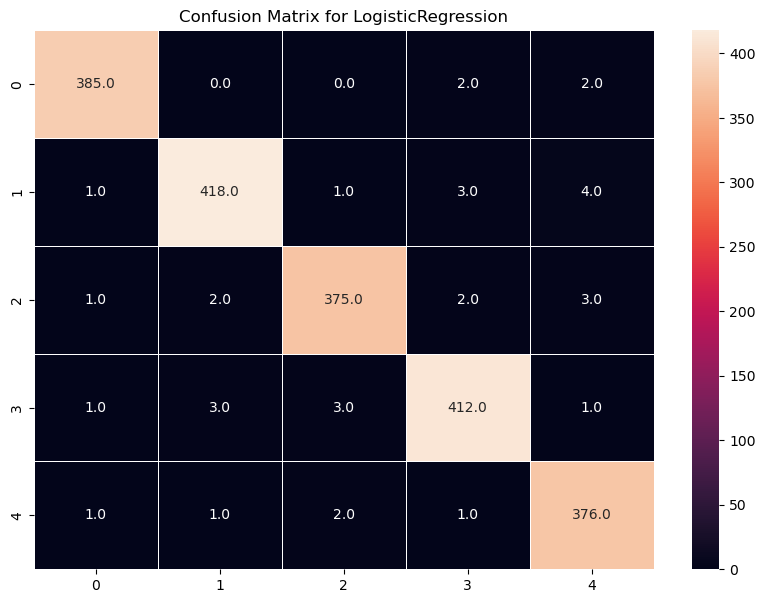

SVC(probability=True)
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


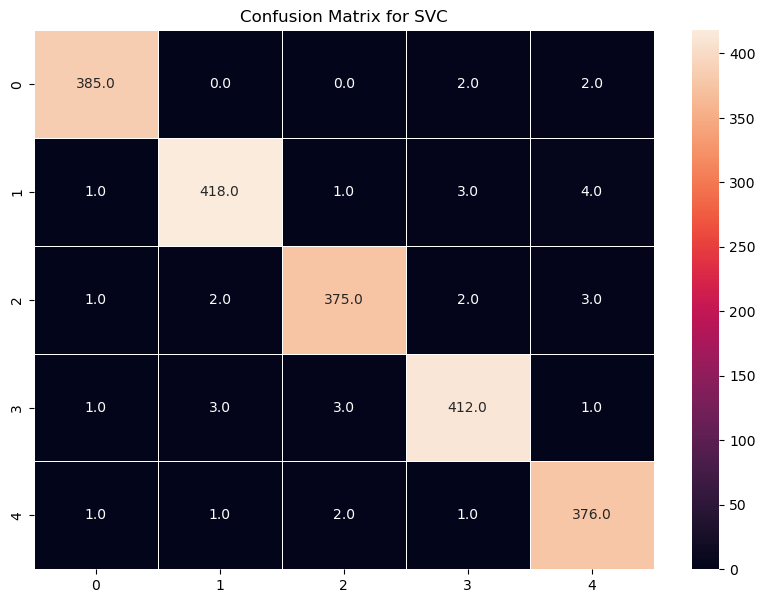

RandomForestClassifier()
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


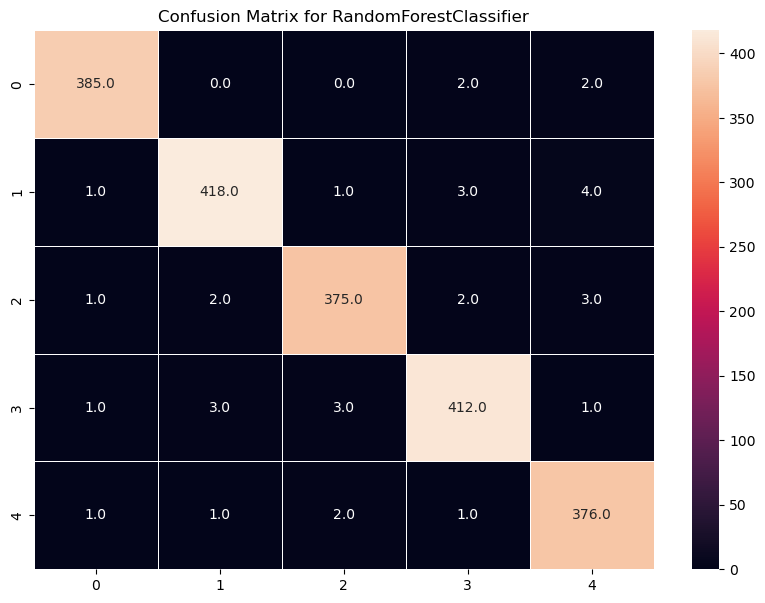

GradientBoostingClassifier()
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


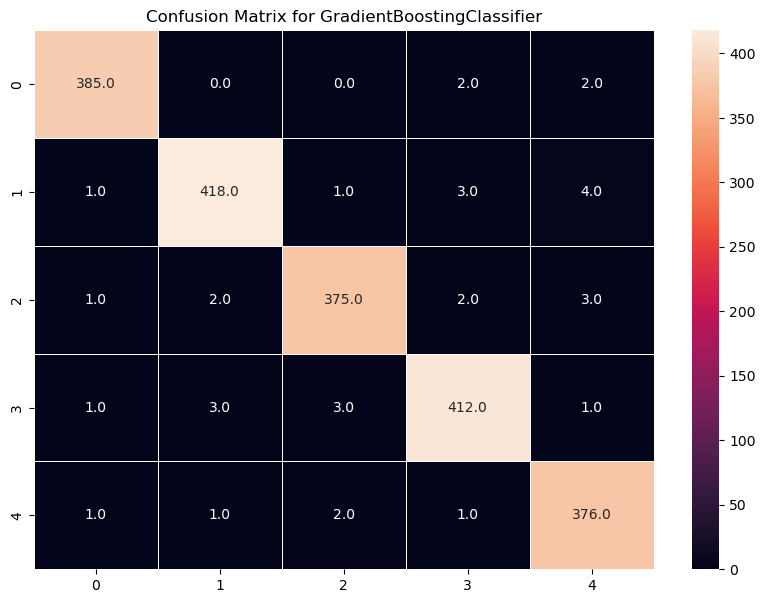

DecisionTreeClassifier()
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


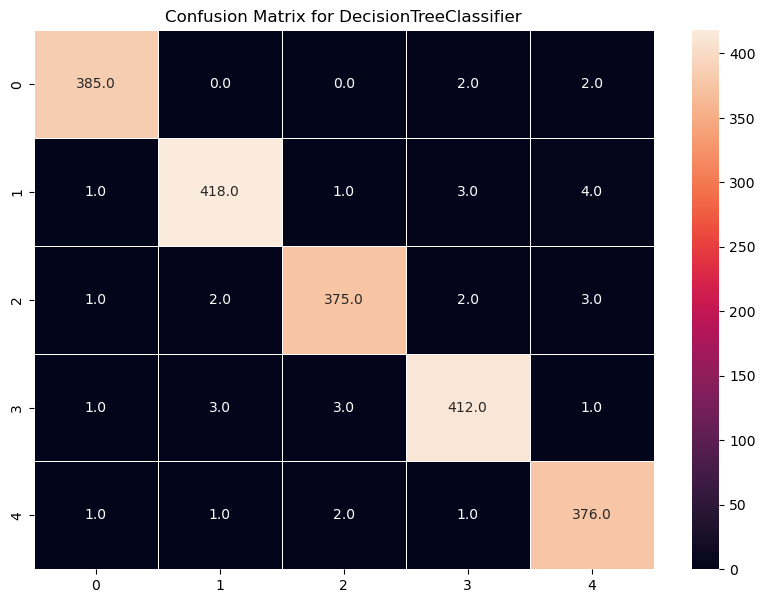

KNeighborsClassifier()
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


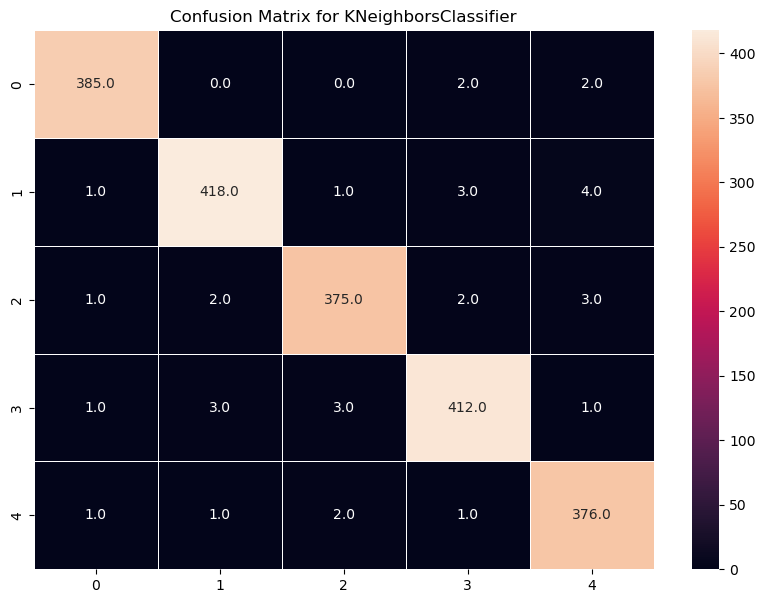

GaussianNB()
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


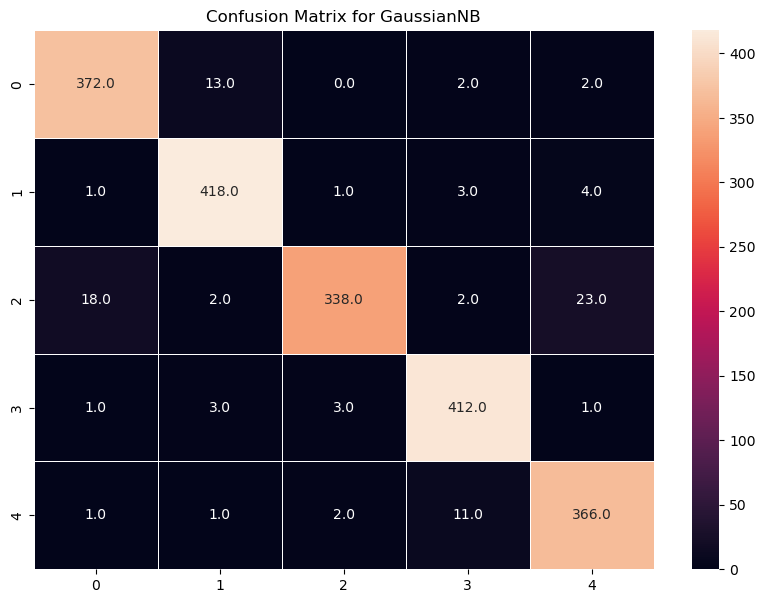

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


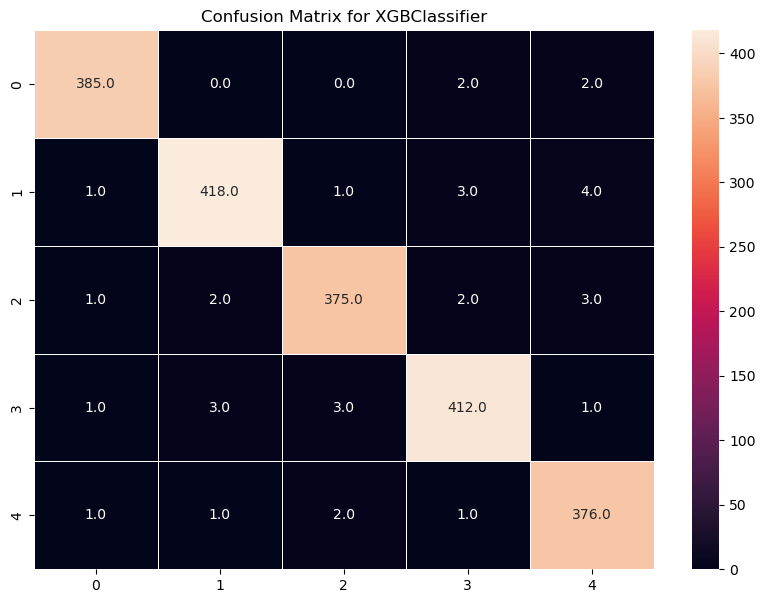

In [42]:
# Apply the function to each model
for model in models:
    All_Models(model, x_train, x_test, y_train, y_test)


In [43]:
# Create a DataFrame to display results
final_result = pd.DataFrame({
    "Algorithms": model_names,
    "Accuracies": Accuracy,
    "Precision_Score": Precision_Score,
    "Recall": Recall,
    "F1": F1
})

In [44]:
final_result

,Algorithms,Accuracies,Precision_Score,Recall,F1
0,LogisticRegression,0.983,0.982973,0.983116,0.983032
1,SVC,0.983,0.982973,0.983116,0.983032
2,RandomForestClassifier,0.983,0.982973,0.983116,0.983032
3,GradientBoostingClassifier,0.983,0.982973,0.983116,0.983032
4,DecisionTreeClassifier,0.983,0.982973,0.983116,0.983032
5,KNeighborsClassifier,0.983,0.982973,0.983116,0.983032
6,GaussianNB,0.953,0.953605,0.951862,0.952069
7,XGBClassifier,0.983,0.982973,0.983116,0.983032


# 7 - Model Evaluation

In [45]:
prediction = model.predict([[5,158]])

In [46]:
prediction

array([3], dtype=int64)